In [1]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup
import re 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Health_AnimalBites 2.csv', dtype={'victim_zip': 'str'})
df.head(5)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985/5/5 0:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985/6/20 0:00,40229,NO,BODY,1985/5/5 0:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986/2/12 0:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986/2/12 0:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987/5/7 0:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990/5/7 0:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988/10/2 0:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990/10/2 0:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989/8/29 0:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [5]:
df=df.drop(['head_sent_date','color','vaccination_yrs','vaccination_date','AdvIssuedYNDesc','head_sent_date','release_date','ResultsIDDesc','DispositionIDDesc'],axis=1)
df.head(5)

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,victim_zip,WhereBittenIDDesc,quarantine_date
0,1985/5/5 0:00,DOG,NaN,FEMALE,40229,BODY,1985/5/5 0:00
1,1986/2/12 0:00,DOG,NaN,UNKNOWN,40218,BODY,1986/2/12 0:00
2,1987/5/7 0:00,DOG,NaN,UNKNOWN,40219,BODY,1990/5/7 0:00
3,1988/10/2 0:00,DOG,NaN,MALE,NaN,BODY,1990/10/2 0:00
4,1989/8/29 0:00,DOG,NaN,FEMALE,NaN,BODY,NaN


In [6]:
df.rename(columns={'SpeciesIDDesc':'Species','BreedIDDesc':'Breed','GenderIDDesc':'Gender','WhereBittenIDDesc':'Bittenpart','DispositionIDDesc':'Disposition'},inplace=True)
df.head(5)

,bite_date,Species,Breed,Gender,victim_zip,Bittenpart,quarantine_date
0,1985/5/5 0:00,DOG,NaN,FEMALE,40229,BODY,1985/5/5 0:00
1,1986/2/12 0:00,DOG,NaN,UNKNOWN,40218,BODY,1986/2/12 0:00
2,1987/5/7 0:00,DOG,NaN,UNKNOWN,40219,BODY,1990/5/7 0:00
3,1988/10/2 0:00,DOG,NaN,MALE,NaN,BODY,1990/10/2 0:00
4,1989/8/29 0:00,DOG,NaN,FEMALE,NaN,BODY,NaN


In [7]:
df['Species'].value_counts()

DOG        7029
CAT        1568
BAT         237
RACCOON      27
OTHER        11
HORSE         5
FERRET        4
RABBIT        3
SKUNK         1
Name: Species, dtype: int64

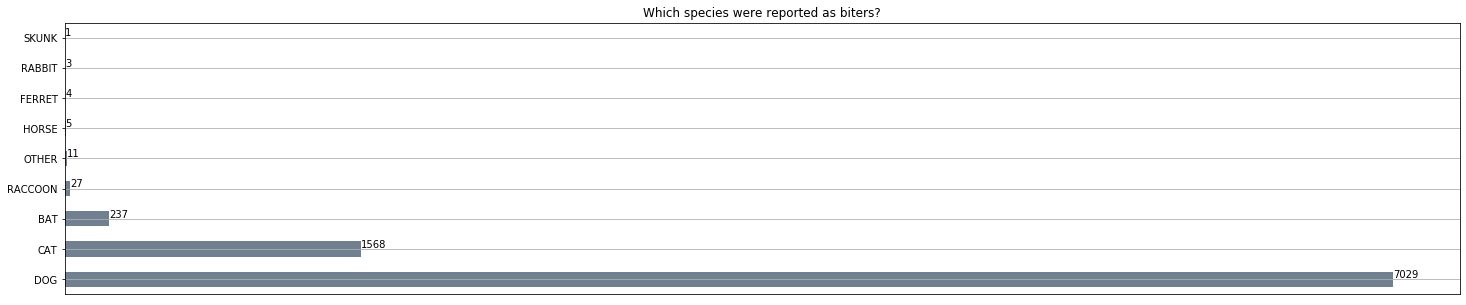

In [8]:
ax=df['Species'].value_counts().plot(kind='barh',title='Which species were reported as biters?',grid=True,color='slategray',figsize=(25,5))
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='black')
    ax.set_xticks([])
plt.savefig('species.pdf')


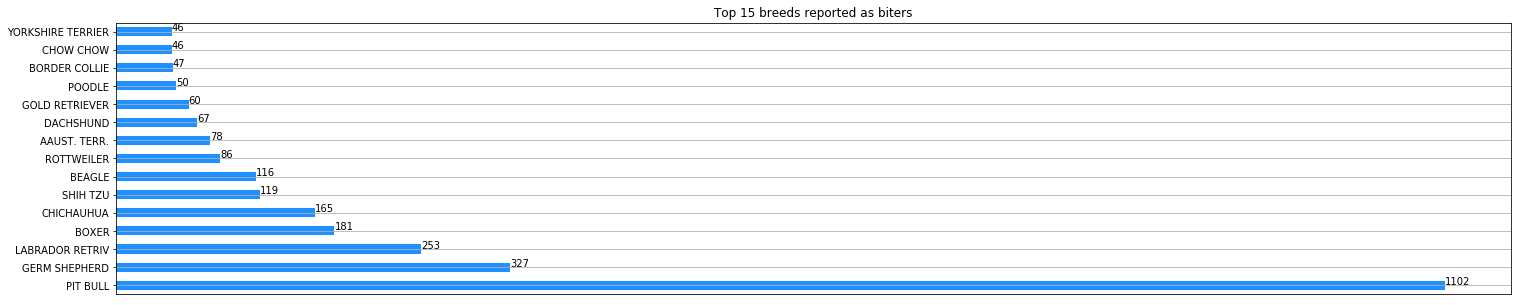

In [9]:
ax2=df['Breed'].value_counts().head(15).plot(kind='barh',title='Top 15 breeds reported as biters',grid=True,color='dodgerblue',figsize=(25,5))
for i in ax2.patches:
    ax2.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='black')
    ax2.set_xticks([])
plt.savefig('breeds.pdf')

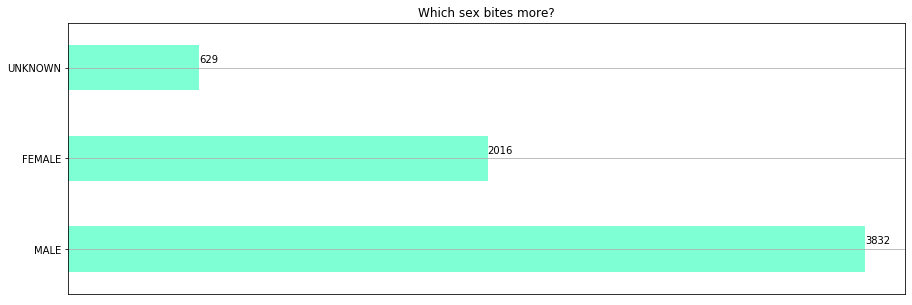

In [10]:
ax3=df['Gender'].value_counts().plot(kind='barh',title='Which sex bites more?',grid=True,color='aquamarine',figsize=(15,5))
for i in ax3.patches:
    ax3.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='black')
    ax3.set_xticks([])
plt.savefig('sex.pdf')

In [11]:
df.head(20)

,bite_date,Species,Breed,Gender,victim_zip,Bittenpart,quarantine_date
0,1985/5/5 0:00,DOG,NaN,FEMALE,40229,BODY,1985/5/5 0:00
1,1986/2/12 0:00,DOG,NaN,UNKNOWN,40218,BODY,1986/2/12 0:00
2,1987/5/7 0:00,DOG,NaN,UNKNOWN,40219,BODY,1990/5/7 0:00
3,1988/10/2 0:00,DOG,NaN,MALE,NaN,BODY,1990/10/2 0:00
4,1989/8/29 0:00,DOG,NaN,FEMALE,NaN,BODY,NaN
5,1989/11/24 0:00,DOG,NaN,UNKNOWN,40211,BODY,NaN
6,1990/2/8 0:00,DOG,NaN,FEMALE,40203,BODY,1990/2/12 0:00
7,1990/2/22 0:00,DOG,NaN,MALE,NaN,BODY,1990/2/23 0:00
8,1990/8/2 0:00,DOG,NaN,MALE,NaN,BODY,1990/8/2 0:00
9,1990/8/19 0:00,DOG,NaN,UNKNOWN,NaN,BODY,1990/8/20 0:00


In [12]:
cleaned=df.dropna(subset=['victim_zip'])
cleaned.head(20)

,bite_date,Species,Breed,Gender,victim_zip,Bittenpart,quarantine_date
0,1985/5/5 0:00,DOG,NaN,FEMALE,40229,BODY,1985/5/5 0:00
1,1986/2/12 0:00,DOG,NaN,UNKNOWN,40218,BODY,1986/2/12 0:00
2,1987/5/7 0:00,DOG,NaN,UNKNOWN,40219,BODY,1990/5/7 0:00
5,1989/11/24 0:00,DOG,NaN,UNKNOWN,40211,BODY,NaN
6,1990/2/8 0:00,DOG,NaN,FEMALE,40203,BODY,1990/2/12 0:00
25,1992/8/6 0:00,DOG,NaN,UNKNOWN,40215,BODY,1992/8/6 0:00
26,1992/8/26 0:00,DOG,NaN,MALE,40210,BODY,1992/8/31 0:00
40,2009/10/29 0:00,CAT,NaN,FEMALE,40206,BODY,2009/10/30 0:00
41,2009/12/2 0:00,DOG,NaN,MALE,40291,BODY,2009/12/3 0:00
42,2009/12/11 0:00,DOG,NaN,MALE,40272,BODY,2009/12/11 0:00


In [13]:
cleaned.to_csv('bites_cleaned.csv',index=False)

In [14]:
zip=pd.read_csv('uszips.csv', dtype={'zip':'str'})
zip.head(5)

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,all_county_weights,imprecise,military,timezone
0,00601,18.1800,-66.7522,Adjuntas,PR,Puerto Rico,True,NaN,18570,111.4,72001,Adjuntas,"{'72001':99.43,'72141':0.57}",False,False,America/Puerto_Rico
1,00602,18.3607,-67.1752,Aguada,PR,Puerto Rico,True,NaN,41520,523.7,72003,Aguada,{'72003':100},False,False,America/Puerto_Rico
2,00603,18.4544,-67.1220,Aguadilla,PR,Puerto Rico,True,NaN,54689,667.9,72005,Aguadilla,{'72005':100},False,False,America/Puerto_Rico
3,00606,18.1672,-66.9383,Maricao,PR,Puerto Rico,True,NaN,6615,60.4,72093,Maricao,"{'72093':94.88,'72121':1.35,'72153':3.78}",False,False,America/Puerto_Rico
4,00610,18.2903,-67.1224,Anasco,PR,Puerto Rico,True,NaN,29016,311.9,72011,Añasco,"{'72003':0.55,'72011':99.45}",False,False,America/Puerto_Rico


In [15]:
zip=zip.drop(['zcta','parent_zcta','county_fips','county_name','all_county_weights','imprecise','military','timezone'],axis=1)
zip.head(5)

,zip,lat,lng,city,state_id,state_name,population,density
0,00601,18.1800,-66.7522,Adjuntas,PR,Puerto Rico,18570,111.4
1,00602,18.3607,-67.1752,Aguada,PR,Puerto Rico,41520,523.7
2,00603,18.4544,-67.1220,Aguadilla,PR,Puerto Rico,54689,667.9
3,00606,18.1672,-66.9383,Maricao,PR,Puerto Rico,6615,60.4
4,00610,18.2903,-67.1224,Anasco,PR,Puerto Rico,29016,311.9


In [16]:
zip=zip.rename(columns={'zip':'victim_zip'})
zip.head(2)

,victim_zip,lat,lng,city,state_id,state_name,population,density
0,00601,18.1800,-66.7522,Adjuntas,PR,Puerto Rico,18570,111.4
1,00602,18.3607,-67.1752,Aguada,PR,Puerto Rico,41520,523.7


In [24]:
zip.groupby('victim_zip').size().reset_index(name='count')

,victim_zip,count
0,00601,1
1,00602,1
2,00603,1
3,00606,1
4,00610,1
5,00612,1
6,00616,1
7,00617,1
8,00622,1
9,00623,1


In [17]:
cleaned=pd.read_csv('bites_cleaned.csv')

In [33]:
result= cleaned.merge(zip, on='victim_zip')
result.head(5)

,bite_date,Species,Breed,Gender,victim_zip,Bittenpart,quarantine_date,lat,lng,city,state_id,state_name,population,density
0,1985/5/5 0:00,DOG,NaN,FEMALE,40229,BODY,1985/5/5 0:00,38.0891,-85.6548,Louisville,KY,Kentucky,36852,720.5
1,2009/12/24 0:00,DOG,NaN,UNKNOWN,40229,BODY,2009/12/29 0:00,38.0891,-85.6548,Louisville,KY,Kentucky,36852,720.5
2,2009/12/30 0:00,DOG,NaN,FEMALE,40229,BODY,2009/12/31 0:00,38.0891,-85.6548,Louisville,KY,Kentucky,36852,720.5
3,2010/1/10 0:00,DOG,NaN,UNKNOWN,40229,HEAD,2010/1/11 0:00,38.0891,-85.6548,Louisville,KY,Kentucky,36852,720.5
4,2010/1/27 0:00,DOG,NaN,FEMALE,40229,BODY,2011/1/28 0:00,38.0891,-85.6548,Louisville,KY,Kentucky,36852,720.5


In [34]:
result["location"] = result["city"] + ',' +result["state_name"]
result.head(3)

,bite_date,Species,Breed,Gender,victim_zip,Bittenpart,quarantine_date,lat,lng,city,state_id,state_name,population,density,location
0,1985/5/5 0:00,DOG,NaN,FEMALE,40229,BODY,1985/5/5 0:00,38.0891,-85.6548,Louisville,KY,Kentucky,36852,720.5,"Louisville,Kentucky"
1,2009/12/24 0:00,DOG,NaN,UNKNOWN,40229,BODY,2009/12/29 0:00,38.0891,-85.6548,Louisville,KY,Kentucky,36852,720.5,"Louisville,Kentucky"
2,2009/12/30 0:00,DOG,NaN,FEMALE,40229,BODY,2009/12/31 0:00,38.0891,-85.6548,Louisville,KY,Kentucky,36852,720.5,"Louisville,Kentucky"


In [35]:
result=result.drop(['quarantine_date','city','state_name','population','density'],axis=1)
result.head(3)

,bite_date,Species,Breed,Gender,victim_zip,Bittenpart,lat,lng,state_id,location
0,1985/5/5 0:00,DOG,NaN,FEMALE,40229,BODY,38.0891,-85.6548,KY,"Louisville,Kentucky"
1,2009/12/24 0:00,DOG,NaN,UNKNOWN,40229,BODY,38.0891,-85.6548,KY,"Louisville,Kentucky"
2,2009/12/30 0:00,DOG,NaN,FEMALE,40229,BODY,38.0891,-85.6548,KY,"Louisville,Kentucky"


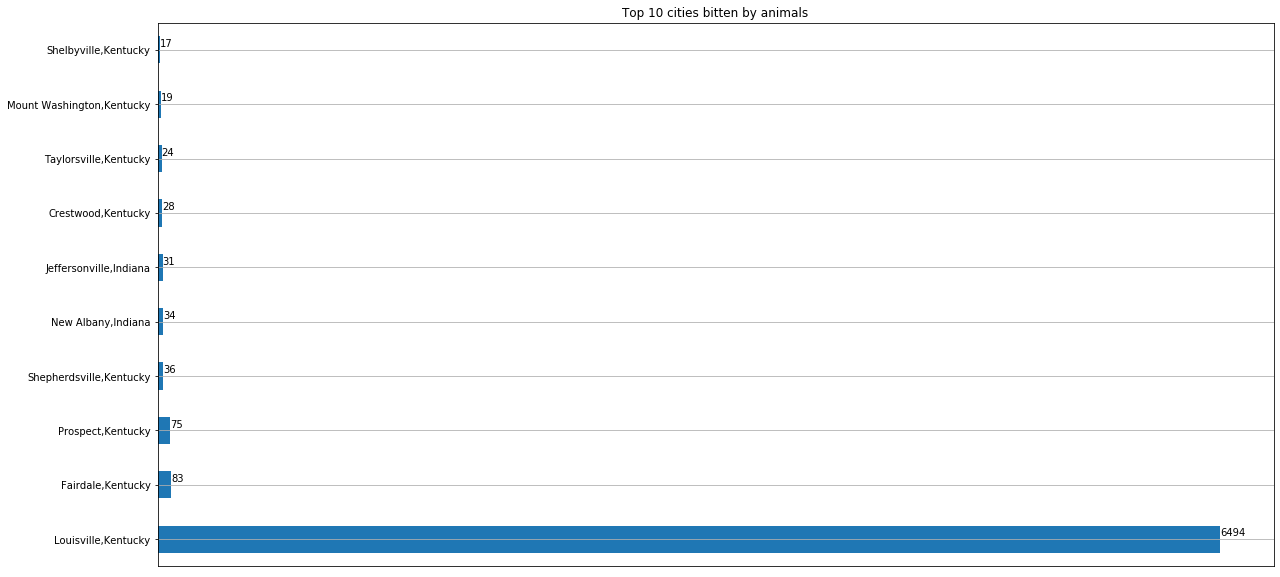

In [43]:
ax4=result.location.value_counts().head(10).plot(title='Top 10 cities bitten by animals',kind='barh',grid=True,figsize=(20,10))
for i in ax4.patches:
    ax4.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='black')
    ax4.set_xticks([])
plt.savefig('Poorlouisville.pdf')